## Missing Data Imputation

Objectives:
At the end of this ICE, you will be able to:
- simulate MCAR data or MAR data
- implement common missing data imputation methods
- (optional) compare the performance of missing data imputation methods on an analysis you have done before.

Missing data is very common in any work related to data analysis. Oftentimes, analyses will suffer from the problem that some observations/entries in the dataset are complete. In this ICE, we will explore a few common data imputation methods that deals with missing data.

## Missing Data Mechanism 

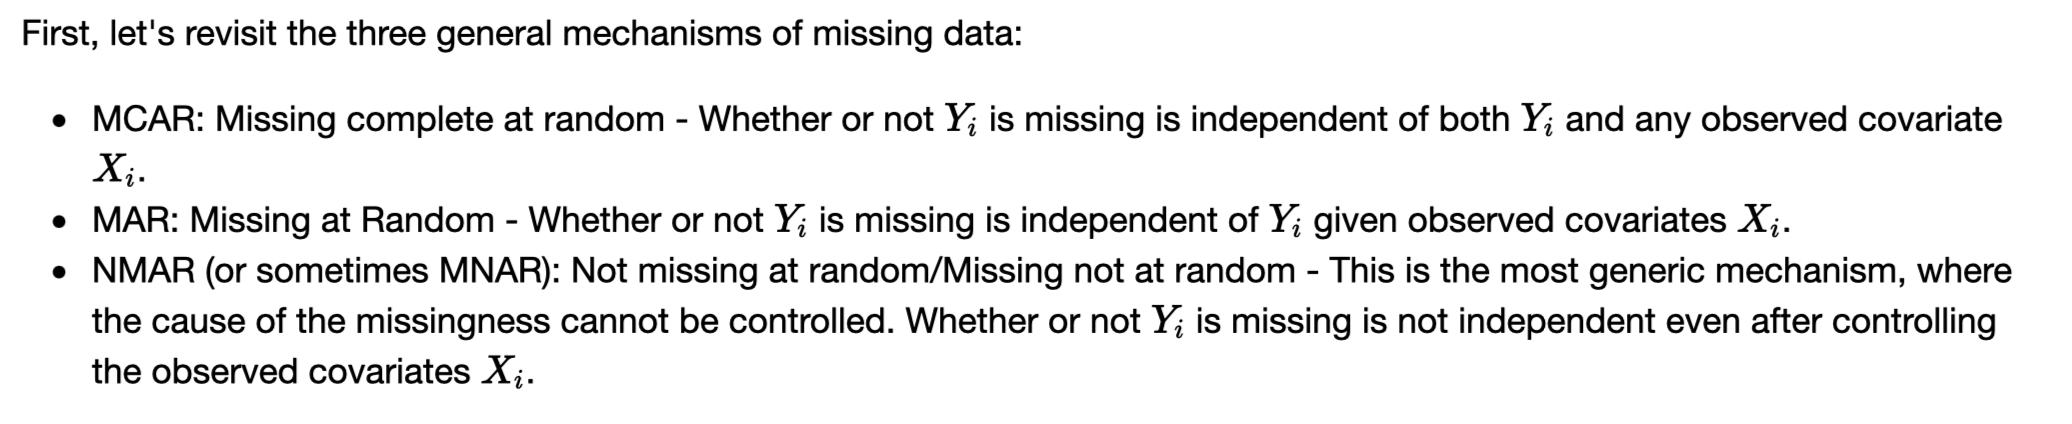

You can check out this [blog](https://tc.instructure.com/courses/19199/files/1690117?wrap=1&fd_cookie_set=1) for some more information, examples, and terminologies in missing data.

In practice, you missing data may be MCAR, MAR, or NMAR. Ultimately, it is a decision/judgement/assumption you have to make because we would not be able to observe the compelte dataset. Therefore, in terms of an ICE practice, we are going to mannually generate some missingness in the data to demonstrate MCAR, MAR, and NMAR.

To illustrate, we are going to use the iris dataset, perhaps one of the best known dataset in data science. You can check out some more details about this dataset on UCI repo: https://archive.ics.uci.edu/ml/datasets/iris

In [18]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [19]:
# IRIS is included in sci-kit learn. We can directly load it.
# See documentation here: https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
irisRaw = datasets.load_iris()

# Convert it to a pandas dataframe for better visualization
iris = pd.DataFrame(data=irisRaw.data, columns=irisRaw.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## MCAR

MCAR would be the easiest. We can simply sample random proportion of the data and replace them NaN. You can choose to randomly insert missingness into one or multiple columns.

In [20]:
iris_MCAR = iris.copy()

In [21]:
# Set the missingness rate at 30%
missing = 0.3

# Only introduce missing rate to the `sepal length (cm)`.
iris_MCAR.loc[iris_MCAR.sample(frac=missing).index, 'sepal length (cm)'] = np.nan

iris_MCAR

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,NaN,3.5,1.4,0.2
1,NaN,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,NaN,3.4,5.4,2.3


In [22]:
# Alternatively, iterate through all columns and introduce 20% missing to all variables.
for col in iris_MCAR.columns:
    iris_MCAR.loc[iris_MCAR.sample(frac=missing).index, col] = np.nan

## MAR

One easy way to generate an MAR data is to use the weights parameter in pd.sample(). The default ‘None’ results in equal probability weighting. If passed a Series, sample() will align with target object on index. Using a DataFrame column as weights, rows with larger value in the the specified column are more likely to be sampled. Read here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [23]:
iris_MAR = iris.copy()

In [24]:
# Set the missingness rate at 30%
missing = 0.3

# Only introduce missing rate to the `sepal length (cm)`.
iris_MAR.loc[iris_MAR.sample(frac=missing, weights = 'sepal width (cm)').index, 'sepal length (cm)'] = np.nan

iris_MAR

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,NaN,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Using the same idea, you can simulate NMAR data. But you need to pretend not knowing the variable when performing analyses.


There are different implementations of simulating missing data (particularly for MAR and NMAR). Here is a different (and slightly more complicated) one: https://rmisstastic.netlify.app/how-to/python/generate_html/how%20to%20generate%20missing%20values

## Deletion Methods

The most straightforward way to handle missing data is to ignore them. There are two different types of deletion methods:
- Listwise deletion (or sometimes known as casewise deletion)
- Pairwise deletion

### Listwise deletion

It produces unbiased estimation only when the data is MCAR. However, the reduced sample size leads to reduced power. In python, we can use dropna() to perform a listwise deletion. You can see here, as we introduced 30% of missing into the dataset, the sample size is now 105.

In [25]:
iris_MCAR_listwise = iris_MCAR.copy()
iris_MCAR_listwise.dropna()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
13,4.3,3.0,1.1,0.1
14,5.8,4.0,1.2,0.2
15,5.7,4.4,1.5,0.4
18,5.7,3.8,1.7,0.3
22,4.6,3.6,1.0,0.2
26,5.0,3.4,1.6,0.4
29,4.7,3.2,1.6,0.2
39,5.1,3.4,1.5,0.2
43,5.0,3.5,1.6,0.6


## Pairwise deletion

Alternatively, we can do pairwise deletion. It only skips the null observation when the it is needed. Therefore, it avoid the data loss issue in listwise deletion to a certain degree. All methods in pandas such as mean, median, sum, etc. uses pairwise deletion by default. You can see that pairwise deletion performs a bit better on MCAR than MAR data (closer to the true estimation).

In [26]:
iris_MCAR_pairwise = iris_MCAR.copy()
iris_MAR_pairwise = iris_MAR.copy()

print("Mean estimation in MCAR data with pairwise deletion",
      iris_MCAR_pairwise['sepal length (cm)'].mean(), 
     "\nSD estimation in MCAR data with pairwise deletion",
      iris_MCAR_pairwise['sepal length (cm)'].std()
     )
print("Mean estimation in MAR data with pairwise deletion",
      iris_MAR_pairwise['sepal length (cm)'].mean(), 
     "\nSD estimation in MAR data with pairwise deletion",
      iris_MAR_pairwise['sepal length (cm)'].std()
     )
print("Mean estimation in the original data",
      iris['sepal length (cm)'].mean(),
      "\nSD estimation in the original data",
      iris['sepal length (cm)'].std()
     )

Mean estimation in MCAR data with pairwise deletion 5.774666666666665 
SD estimation in MCAR data with pairwise deletion 0.818715759891976
Mean estimation in MAR data with pairwise deletion 5.723809523809524 
SD estimation in MAR data with pairwise deletion 0.8011438708693355
Mean estimation in the original data 5.843333333333335 
SD estimation in the original data 0.8280661279778629


## Single Imputation

As opposed to deletion, we can impute (or in plain English -- "guess") the missing value with various imputation methods.


### Simple imputation

The simplest ones include mean/median/model imputation. Read here about the simple imputation in sci-kit learn: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer

For MCAR data, simple imputation produces unbiased estimation of marginal means, but underestimates variances, and overestimate correlations.

In [27]:
from sklearn.impute import SimpleImputer
iris_MAR_mean = iris_MAR.copy()

In [28]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(iris_MAR)
print(imp.transform(iris_MAR))

[[5.1        3.5        1.4        0.2       ]
 [4.9        3.         1.4        0.2       ]
 [4.7        3.2        1.3        0.2       ]
 [4.6        3.1        1.5        0.2       ]
 [5.         3.6        1.4        0.2       ]
 [5.72380952 3.9        1.7        0.4       ]
 [4.6        3.4        1.4        0.3       ]
 [5.72380952 3.4        1.5        0.2       ]
 [4.4        2.9        1.4        0.2       ]
 [4.9        3.1        1.5        0.1       ]
 [5.72380952 3.7        1.5        0.2       ]
 [4.8        3.4        1.6        0.2       ]
 [5.72380952 3.         1.4        0.1       ]
 [4.3        3.         1.1        0.1       ]
 [5.8        4.         1.2        0.2       ]
 [5.7        4.4        1.5        0.4       ]
 [5.4        3.9        1.3        0.4       ]
 [5.1        3.5        1.4        0.3       ]
 [5.7        3.8        1.7        0.3       ]
 [5.72380952 3.8        1.5        0.3       ]
 [5.72380952 3.4        1.7        0.2       ]
 [5.72380952 

### Regression Imputation/Conditional Mean Imputation¶

A more common way to impute the missing value based on regression/anova models. In this case, you are modeling the dependency through the observed covariate(s). This can work fairly well if you can identify the correct covariate(s) that are related to the missingness.

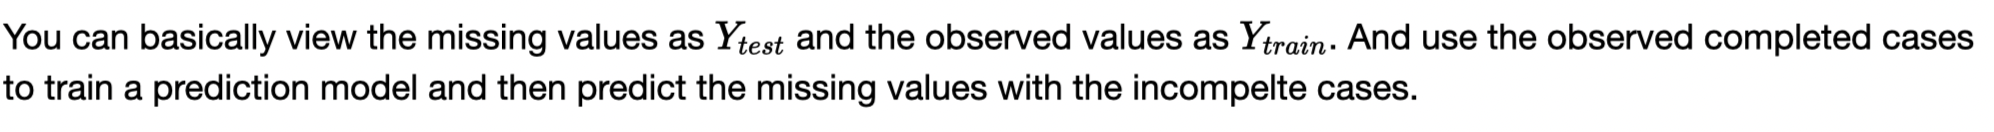

In [29]:
from sklearn import linear_model
iris_MAR_regression = iris_MAR.copy()

In [30]:
iris_MAR_regression_model = iris_MAR_regression.copy().dropna()

model = linear_model.LinearRegression()
Xs = iris_MAR_regression_model['sepal width (cm)'].values.reshape(-1, 1)
ys = iris_MAR_regression_model['sepal length (cm)'].values.reshape(-1, 1)
model.fit(X = Xs, y = ys)

null_index = iris_MAR_regression['sepal length (cm)'].isnull()

na_result = model.predict(iris_MAR_regression[null_index]['sepal width (cm)'].values.reshape(-1, 1))


iris_MAR_regression.loc[iris_MAR_regression['sepal length (cm)'].isnull(), 'sepal length (cm)'] = na_result.reshape(len(na_result),)

iris_MAR_regression

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.10000,3.5,1.4,0.2
1,4.90000,3.0,1.4,0.2
2,4.70000,3.2,1.3,0.2
3,4.60000,3.1,1.5,0.2
4,5.00000,3.6,1.4,0.2
...,...,...,...,...
145,5.73284,3.0,5.2,2.3
146,6.30000,2.5,5.0,1.9
147,6.50000,3.0,5.2,2.0
148,6.20000,3.4,5.4,2.3


### Nearest neighbours or hot-deck imputation

Similarly, you can use other prediction methods to perform the imputation. One a commonly used method is KNN, as a type of hot-deck imputation. Here is the sci-kit learn implementation. By default, it draws from all the variables.

In [31]:
from sklearn.impute import KNNImputer
iris_MAR_knn = iris_MAR.copy()

In [32]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")

knn_imputer.fit_transform(iris_MAR_knn)

array([[5.1 , 3.5 , 1.4 , 0.2 ],
       [4.9 , 3.  , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.3 , 0.2 ],
       [4.6 , 3.1 , 1.5 , 0.2 ],
       [5.  , 3.6 , 1.4 , 0.2 ],
       [5.4 , 3.9 , 1.7 , 0.4 ],
       [4.6 , 3.4 , 1.4 , 0.3 ],
       [4.95, 3.4 , 1.5 , 0.2 ],
       [4.4 , 2.9 , 1.4 , 0.2 ],
       [4.9 , 3.1 , 1.5 , 0.1 ],
       [5.2 , 3.7 , 1.5 , 0.2 ],
       [4.8 , 3.4 , 1.6 , 0.2 ],
       [4.9 , 3.  , 1.4 , 0.1 ],
       [4.3 , 3.  , 1.1 , 0.1 ],
       [5.8 , 4.  , 1.2 , 0.2 ],
       [5.7 , 4.4 , 1.5 , 0.4 ],
       [5.4 , 3.9 , 1.3 , 0.4 ],
       [5.1 , 3.5 , 1.4 , 0.3 ],
       [5.7 , 3.8 , 1.7 , 0.3 ],
       [5.2 , 3.8 , 1.5 , 0.3 ],
       [4.8 , 3.4 , 1.7 , 0.2 ],
       [5.15, 3.7 , 1.5 , 0.4 ],
       [4.6 , 3.6 , 1.  , 0.2 ],
       [5.1 , 3.3 , 1.7 , 0.5 ],
       [4.8 , 3.4 , 1.9 , 0.2 ],
       [5.  , 3.  , 1.6 , 0.2 ],
       [5.25, 3.4 , 1.6 , 0.4 ],
       [5.2 , 3.5 , 1.5 , 0.2 ],
       [5.2 , 3.4 , 1.4 , 0.2 ],
       [4.7 , 3.2 , 1.6 , 0.2 ],
       [4.

## Multiple Imputation

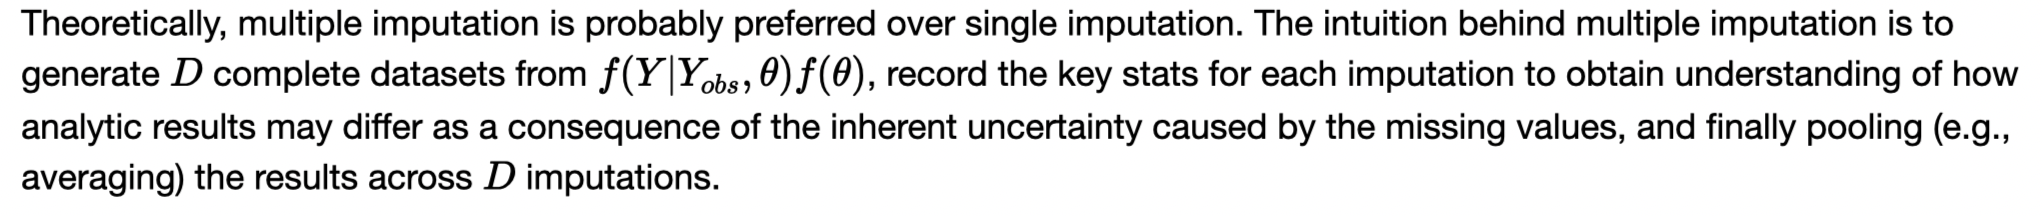

Sci-kit learn implement this idea through iterativeImputer(), but only returning one single imputation at one time. You can read more here: https://scikit-learn.org/stable/modules/impute.html#id3

It is also implemented in statsmodels in a different way. Read more here: https://www.statsmodels.org/stable/imputation.html

If you want to learn more about multiple imputation, [The Chapter 3 of Applied Missing Data Analysis With SPSS and (R)Studio is a good place to start.](https://bookdown.org/mwheymans/bookmi/)

I am not going to lie: Although multiple imputations have been proposed for a while and are proven to produce slightly better results, single imputation is still widely used in practice because it is really not that horrible if you can identify the correct covariate(s).

Your Tasks for ICE 5
For ICE 5, you will want to:
- follow the tutorial and learn the basics of handling missing data in Python.
- think about what are you going to do with this method (e.g., implications and applications).
- keep a good record of your ICEs. Save the .ipynb files in a same place. You will need them later.